# Spotted Python Week 8 Tutorial
In this script, we aim to practice the following skills:
- Finding photometric redshift
- Integration using multiple methods
- Chemical Abundance
- Initial Mass Function
- Cosmological calculator

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import astropy.cosmology as cosmo
from astropy.io import fits
import eazy
eazy.fetch_eazy_photoz()
from eazy import photoz

## SED Fitting


### **Example 1:**
AGEL211627-594702 is a strong gravitational lens as part of the AGEL survey sample. Using source detection software, the flux of the sources across multiple bands (g, r, i, z, y) have been extracted and given in the file *AGEL211627-594702_flux.csv*. Below, we will go through an example of how photometric redshifts can be derived using SED fitting.

In [2]:
# Dictionary of parameters to be used in EAZY
params = {}
params['CATALOG_FILE'] = 'flux.csv'
params['MAIN_OUTPUT_FILE'] = 'output/output.eazypy'

# Galactic extinction
params['MW_EBV'] = 0.0103 #degree of interstellar reddening E(B-V)=(B-V)-(B-V)_0

# Redshift steps
params['Z_STEP'] = 0.01
params['Z_MIN'] = 0.01
params['Z_MAX'] = 2

# Prior
params['PRIOR_ABZP'] = 22.5 # conversion factor from linear flux to magnitudes when flux is in nanomaggies
params['PRIOR_FILTER'] = 28 # K-band
params['PRIOR_FILE'] = 'templates/prior_K_TAO.dat'
params['TEMPLATES_FILE'] = 'templates/fsps_full/tweak_fsps_QSF_12_v3.param'
params['FIX_ZSPEC'] = False
params['IGM_SCALE_TAU'] = 1.0
translate_file = 'translate.csv'

In [6]:
# Run the photoZ class
self = photoz.PhotoZ(param_file=None, translate_file=translate_file, zeropoint_file=None,
                          params=params, load_prior=True, load_products=False)

# Fit the full catalog
sample = np.isfinite(self.ZSPEC)
self.fit_catalog(self.idx[sample], n_proc=8)
zout, hdu = self.standard_output(simple=False,
                                 rf_pad_width=0.5, rf_max_err=2,
                                 prior=True, beta_prior=True,
                                 absmag_filters=[],
                                 extra_rf_filters=[])

Read default param file: /Users/z5309211/miniconda3/envs/ngistenv/lib/python3.11/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: flux.csv
   >>> NOBJ = 14
f_DECam_g e_DECam_g (294): DECam/DECam_g.txt
f_DECam_r e_DECam_r (295): DECam/DECam_r.txt
f_DECam_i e_DECam_i (296): DECam/DECam_i.txt
f_DECam_z e_DECam_z (297): DECam/DECam_z.txt
f_DECam_y e_DECam_y (298): DECam/DECam_Y.txt
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  templates/prior_K_TAO.dat
Template grid: templates/fsps_full/tweak_fsps_QSF_12_v3.param (this may take some time)


100%|██████████| 12/12 [00:22<00:00,  1.86s/it]


Template   0: tweak_fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: tweak_fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: tweak_fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: tweak_fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: tweak_fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: tweak_fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: tweak_fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: tweak_fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: tweak_fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: tweak_fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: tweak_fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: tweak_fsps_QSF_12_v3_012.dat (NZ=1).
Process templates: 22.587 s


109it [00:00, 24644.45it/s]
100%|██████████| 109/109 [00:02<00:00, 41.73it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=14)
Fit 2.7 s (n_proc=8, NOBJ=14)
Get best fit coeffs & best redshifts
fit_best: 0.2 s (n_proc=1,  NOBJ=14)
Get parameters (UBVJ=[153, 154, 155, 161], simple=False)


100%|██████████| 14/14 [00:00<00:00, 187.18it/s]


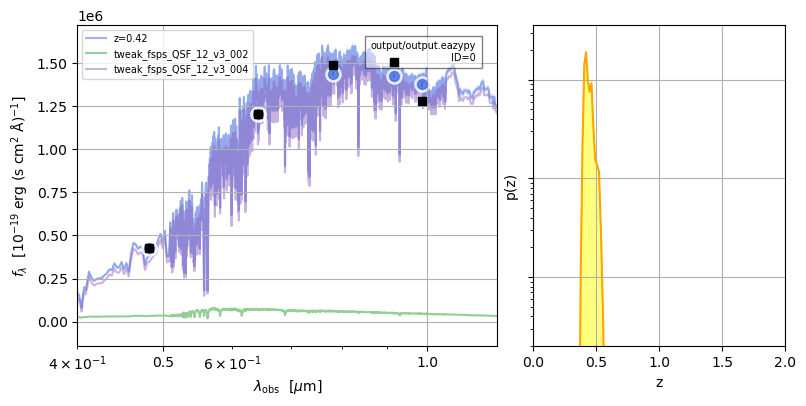

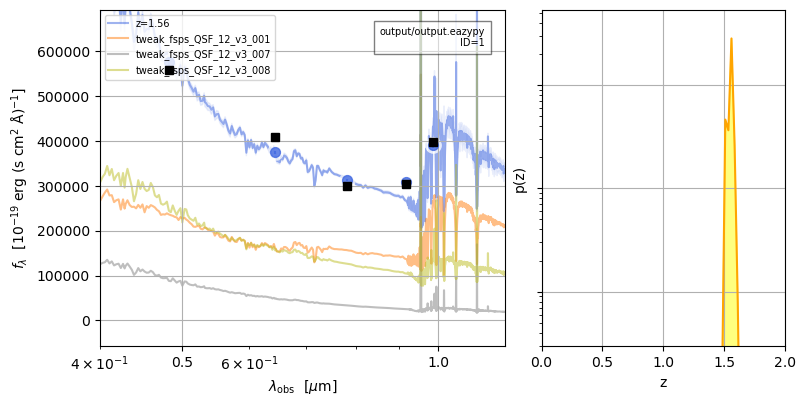

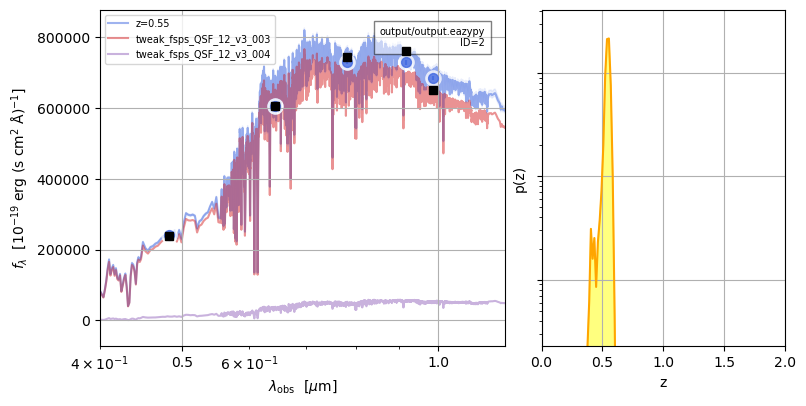

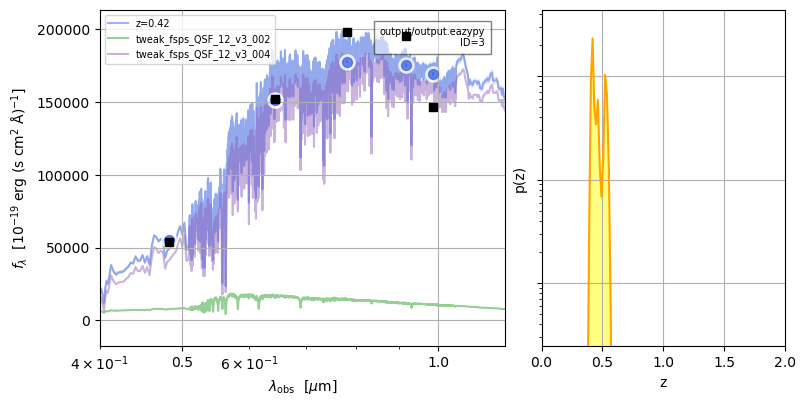

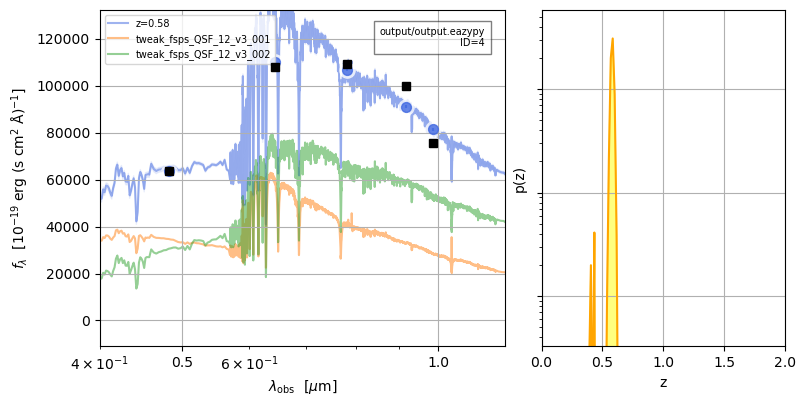

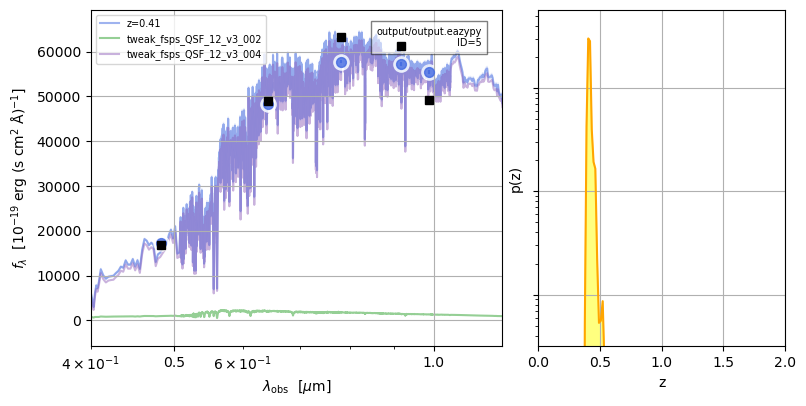

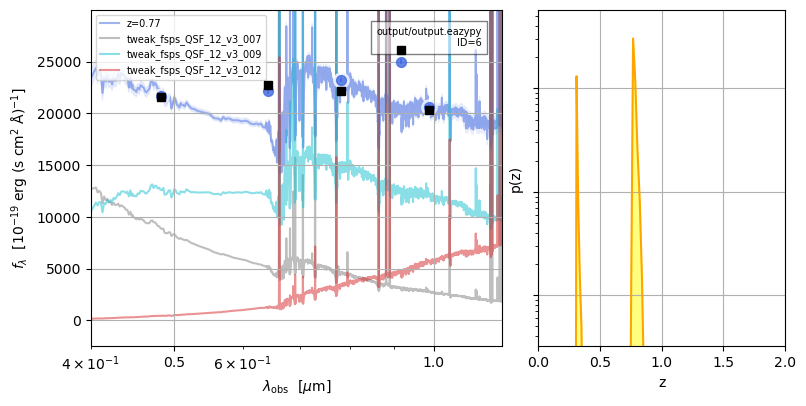

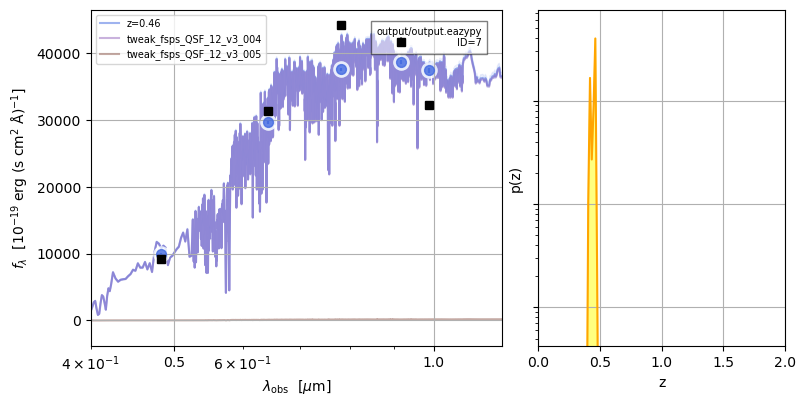

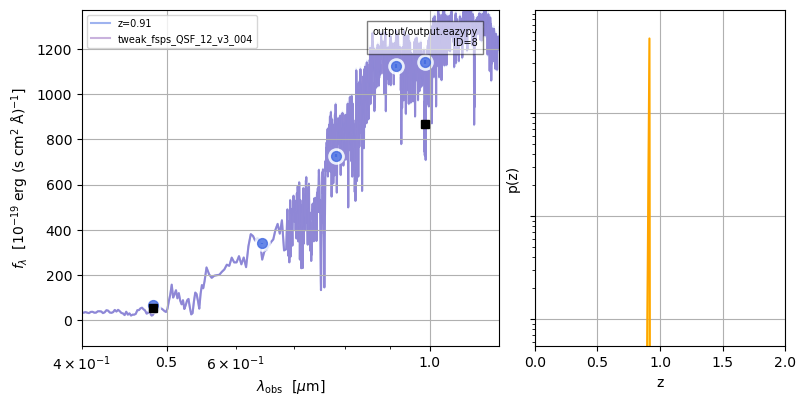

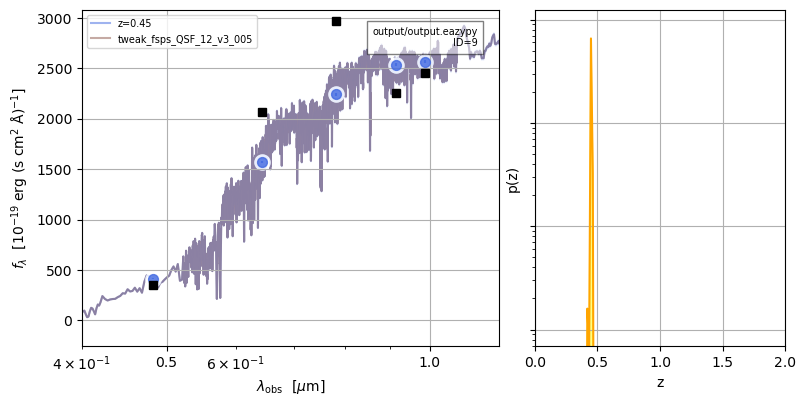

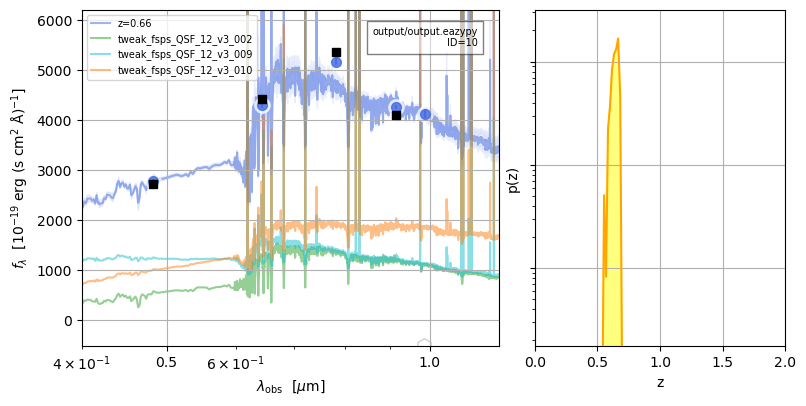

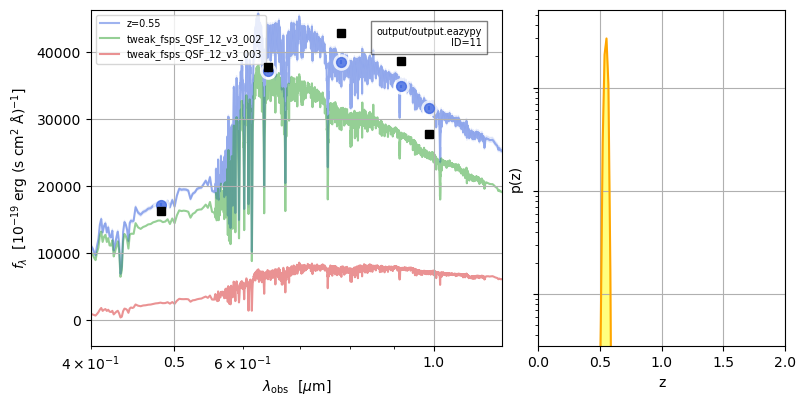

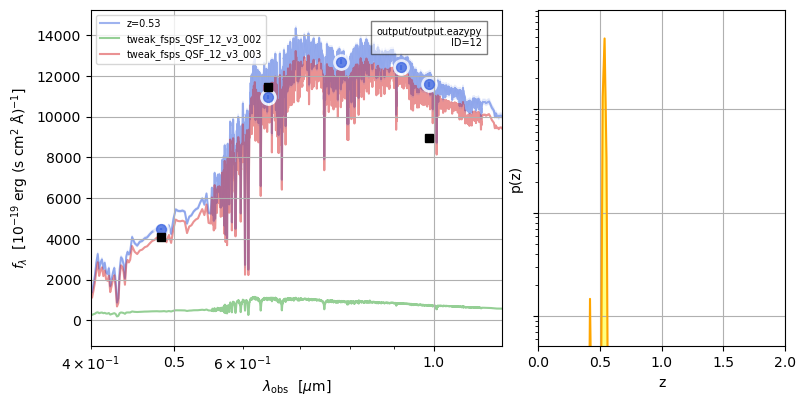

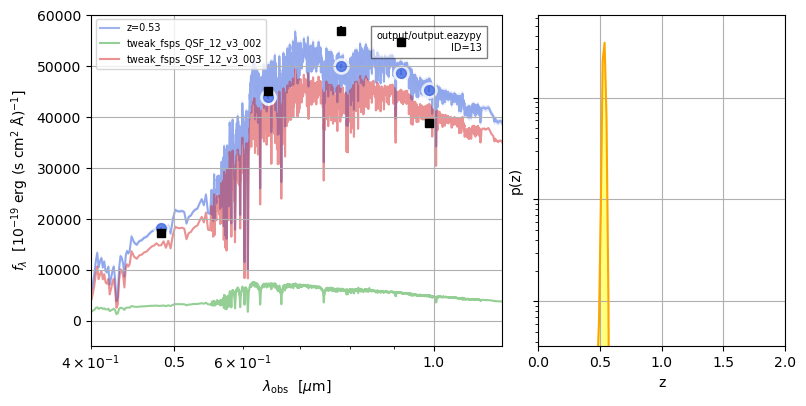

In [7]:
# SED Fits
for s in range(0,len(zout['id'])):
    self.OBJID[s]=s
    ix = np.where(self.OBJID == s)[0][0]
    fig, data = self.show_fit(s, xlim=[0.4, 1.2], # wavelength ranges from 0.398 to 1.065 microns
                        show_components=True, add_label=True,
                        template_color='royalblue', logpz=True, zr=[0,params['Z_MAX']])

## Integrating inital mass functions
### **Example 2:**
Given the normalised Miller-Scalo IMF for $0.01\leq M/M_\odot\leq1$ is $$\xi(M)=0.753M^{-1.4}.$$ Calculate the total stellar mass function by integration.

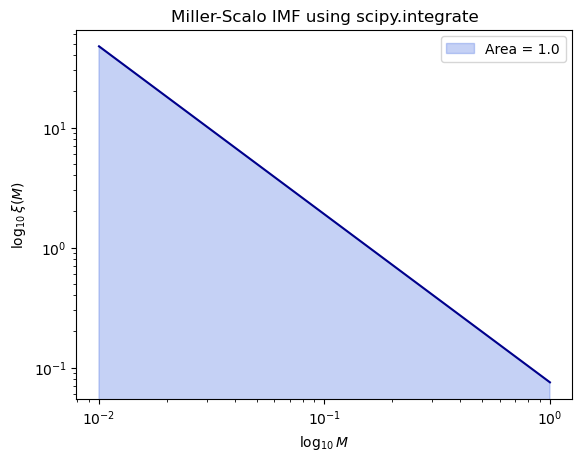

In [8]:
# Method 1: scipy.integrate
# Define function
def miller_scalo(m):
    return 0.0753*m**-1.4

# define mass range
miller_scalo_lower = 0.01
miller_scalo_upper = 1
miller_scalo_mass = np.linspace(miller_scalo_lower, miller_scalo_upper, 100)

# integrate the function
miller_scalo_scipy = integrate.quad(miller_scalo, miller_scalo_lower, miller_scalo_upper)
miller_scalo_label_scipy = f'Area = {round(miller_scalo_scipy[0],3)}'

# plot function and area under
plt.plot(miller_scalo_mass, miller_scalo(miller_scalo_mass), color='darkblue') # plots the function
plt.fill_between(miller_scalo_mass, miller_scalo(miller_scalo_mass), alpha=0.3, color="royalblue", label=miller_scalo_label_scipy) # fills the area
plt.xlabel("$\log_{10} M$")
plt.ylabel("$\log_{10} ξ(M)$")
plt.xscale('log')
plt.yscale('log')
plt.title("Miller-Scalo IMF using scipy.integrate")
plt.legend()
plt.show()

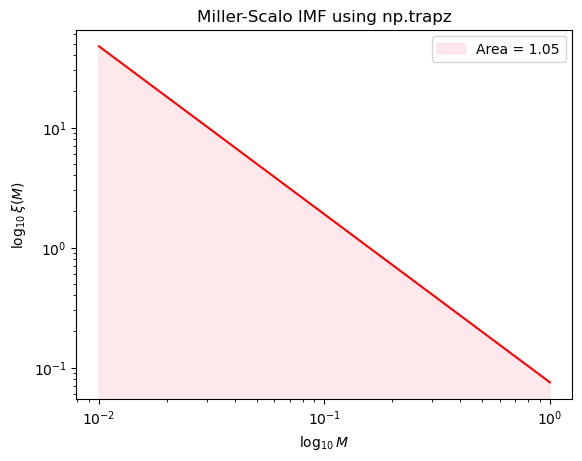

In [9]:
# Method 2: np.trapz
miller_scalo_trapz = np.trapz(miller_scalo(miller_scalo_mass), miller_scalo_mass)
miller_scalo_label_trapz = 'Area = ' + str(round(miller_scalo_trapz,3))

# plot function and area under
plt.plot(miller_scalo_mass, miller_scalo(miller_scalo_mass), color='red') # plots the function
plt.fill_between(miller_scalo_mass, miller_scalo(miller_scalo_mass), alpha=0.3, color="lightpink", label=miller_scalo_label_trapz) # fills the area
plt.xlabel("$\log_{10} M$")
plt.ylabel("$\log_{10} ξ(M)$")
plt.xscale('log')
plt.yscale('log')
plt.title("Miller-Scalo IMF using np.trapz")
plt.legend()
plt.show()

### **Exercise 1:**
Given the normalised Chabrier IMF for $0.01\leq M/M_\odot\leq1$ is $$\xi(M)=\frac{3.63}{M\ln 10}\exp\left[-\frac{(\log M - \log 0.079)^2}{2(0.69)^2}\right].$$ Select one of the above methods, and calculate the total stellar mass function by integration.

In [ ]:
# Method 1: scipy.integrate
# Define function
def chabrier(m): # 
    return (3.63/(m*np.log(10))) * np.exp(-(-np.log(m/0.079))**2/(2*0.69**2))

# define mass range
chabrier_lower = 0.1
chabrier_upper = 1
chabrier_mass = np.linspace(chabrier_lower, chabrier_upper, 1000)

# integrate the function
chabrier_scipy = integrate.quad(chabrier, chabrier_lower, chabrier_upper)
chabrier_label_scipy = 'Area = ' + str(round(chabrier_scipy[0],3))

# plot function and area under
plt.plot(chabrier_mass, chabrier(chabrier_mass), color='darkblue') # plots the function
plt.fill_between(chabrier_mass, chabrier(chabrier_mass), alpha=0.3, color="royalblue", label=chabrier_label_scipy) # fills the area
plt.xlabel("$\log_{10} M$")
plt.ylabel("$\log_{10} ξ(M)$")
plt.xscale('log')
plt.yscale('log')
plt.title("Chabrier IMF using scipy.integrate")
plt.legend()
plt.show()

In [ ]:
# Method 2: np.trapz
chabrier_trapz = np.trapz(chabrier(chabrier_mass), chabrier_mass)
chabrier_label_trapz = 'Area = ' + str(round(chabrier_trapz,3))

# plot function and area under
plt.plot(chabrier_mass, chabrier(chabrier_mass), color='red') # plots the function
plt.fill_between(chabrier_mass, chabrier(chabrier_mass), alpha=0.3, color="lightpink", label=chabrier_label_trapz) # fills the area
plt.xlabel("$\log_{10} M$")
plt.ylabel("$\log_{10} ξ(M)$")
plt.xscale('log')
plt.yscale('log')
plt.title("Chabrier IMF using scipy.integrate")
plt.legend()
plt.show()

## Integrating Spectral Lines
### **Example 3:**
Equivalent width of an emission lines is given by: $$W_\lambda=\int\left(\frac{F_\lambda}{F_c}-1\right)d\lambda.$$ Using *example_spectra_1.fits* from week 5, calculate the equivalent width of the $H_\alpha$ emission line.

In [10]:
# open fits file and set variables
hdu_1 = fits.open('example_spectra_1.fits')
header_1 = hdu_1['DATA'].header
flux_1 = hdu_1['DATA'].data
wavelength_1 = header_1['CRVAL1'] + header_1['CDELT1']*np.arange(flux_1.shape[0])

Text(0, 0.5, 'Flux, $F$ $[10^{-20} \\mathring{A}^{-1} cm^{-2} erg s^{-1}]$')

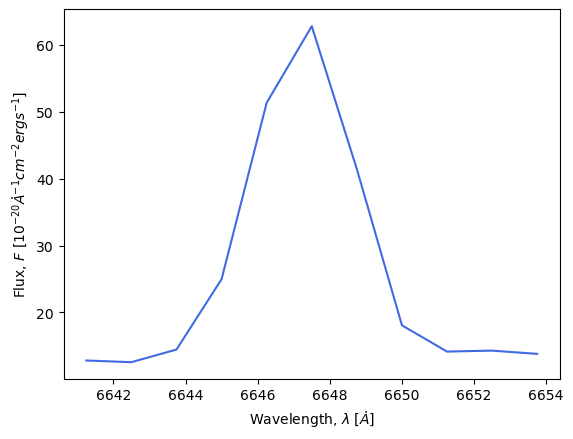

In [11]:
# focus on the h_alpha line
index_1 = np.where(np.logical_and(wavelength_1<6655, wavelength_1>6640)) # index for wavelength around the h alpha line
wavelength_1_cut = wavelength_1[index_1[0]]
flux_1_cut = flux_1[index_1[0]]
plt.plot(wavelength_1_cut, flux_1_cut, color='royalblue')
plt.xlabel('Wavelength, $\lambda$ $[\mathring{A}]$') # x-axis label
plt.ylabel('Flux, $F$ $[10^{-20} \mathring{A}^{-1} cm^{-2} erg s^{-1}]$') # y-axis label

In [12]:
# integate spectral line using trapz
continuum_1 = np.median(flux_1) # as an approximate
ew_formula_1 = flux_1_cut/continuum_1-1
ew_1 = np.trapz(ew_formula_1, wavelength_1_cut)
ew_1

10.96805714070797

### **Exercise 2:**
Using *example_spectra_2.fits* from week 5, calculate the equivalent width of the $H_\alpha$ emission line.

In [ ]:
# open fits file and set variables
hdu_2 = fits.open('example_spectra_2.fits')
header_2 = hdu_2['DATA'].header
flux_2 = hdu_2['DATA'].data
wavelength_2 = header_2['CRVAL1'] + header_2['CDELT1']*np.arange(flux_2.shape[0])

In [ ]:
# focus on the h_alpha line
index_2 = np.where(np.logical_and(wavelength_2<6626, wavelength_2>6615)) # index for wavelength around the h alpha line
wavelength_2_cut = wavelength_2[index_2[0]]
flux_2_cut = flux_2[index_2[0]]
plt.plot(wavelength_2_cut, flux_2_cut, color='royalblue')
plt.xlabel('Wavelength, $\lambda$ $[\mathring{A}]$') # x-axis label
plt.ylabel('Flux, $F$ $[10^{-20} \mathring{A}^{-1} cm^{-2} erg s^{-1}]$') # y-axis label

In [ ]:
# integate spectral line using trapz
continuum_2 = np.median(flux_2) # as an approximate
ew_formula_2 = flux_2_cut/continuum_2-1
ew_2 = np.trapz(ew_formula_2, wavelength_2_cut)
ew_2

## Cosmology in Python
Astropy.cosmology offers function to calculate distances, ages, lookback times depending on a cosmological model. However, it is limited to the flat $\Lambda CDM$ model.
### **Example 4:**

In [13]:
cosmo.Planck18.H(0) # hubble constant using parameters from the Planck Collaboration (2020)

<Quantity 67.66 km / (Mpc s)>

In [14]:
cosmo.WMAP3.H(0.18) # hubble parameter at redshift 0.18 using parameters from pergel et al. (2007) 

<Quantity 76.06921243 km / (Mpc s)>

In [15]:
cosmo.WMAP7.comoving_distance(np.array([0.5, 1.0, 1.5])) # comoving distance for objects at redshifts of 0.5, 1.0 and 1.5

<Quantity [1896.39527964, 3341.18070627, 4433.8586322 ] Mpc>

In [16]:
cosmo.Planck13.lookback_time(1.9)

<Quantity 10.34517677 Gyr>